<a href="https://colab.research.google.com/github/sepety/RL_Otus/blob/main/Otus_PPO_Wether.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка необходимых библиотек
!pip install gymnasium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 32.1 MB/s eta 0:00:00


In [2]:
!pip install torch

In [3]:
import pandas as pd

# Путь к сохранённым данным
file_path = '/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/final_data_for_rl.csv'

# Загрузка данных
combined_df = pd.read_csv(file_path)

print("Данные загружены. Размер:", combined_df.shape)
print("Список столбцов:", combined_df.columns.tolist())


Данные загружены. Размер: (341879, 49)
Список столбцов: ['dt_iso', 'temp_veshenskaya', 'dew_point_veshenskaya', 'feels_like_veshenskaya', 'pressure_veshenskaya', 'humidity_veshenskaya', 'wind_speed_veshenskaya', 'wind_deg_veshenskaya', 'clouds_all_veshenskaya', 'temp_boguchar', 'dew_point_boguchar', 'feels_like_boguchar', 'pressure_boguchar', 'humidity_boguchar', 'wind_speed_boguchar', 'wind_deg_boguchar', 'clouds_all_boguchar', 'temp_serafimovich', 'dew_point_serafimovich', 'feels_like_serafimovich', 'pressure_serafimovich', 'humidity_serafimovich', 'wind_speed_serafimovich', 'wind_deg_serafimovich', 'clouds_all_serafimovich', 'temp_uryupinsk', 'dew_point_uryupinsk', 'feels_like_uryupinsk', 'pressure_uryupinsk', 'humidity_uryupinsk', 'wind_speed_uryupinsk', 'wind_deg_uryupinsk', 'clouds_all_uryupinsk', 'temp_morozovsk', 'dew_point_morozovsk', 'feels_like_morozovsk', 'pressure_morozovsk', 'humidity_morozovsk', 'wind_speed_morozovsk', 'wind_deg_morozovsk', 'clouds_all_morozovsk', 'seaso

In [4]:
# Преобразуем dt_iso в datetime, если это ещё не сделано
combined_df['dt_iso'] = pd.to_datetime(combined_df['dt_iso'], errors='coerce')

# Проверяем формат
print("Тип данных dt_iso:", combined_df['dt_iso'].dtype)
print("Пример значений dt_iso:", combined_df['dt_iso'].head())


Тип данных dt_iso: datetime64[ns]
Пример значений dt_iso: 0   1985-01-01 01:00:00
1   1985-01-01 02:00:00
2   1985-01-01 03:00:00
3   1985-01-01 04:00:00
4   1985-01-01 05:00:00
Name: dt_iso, dtype: datetime64[ns]


In [5]:
import torch

# Проверка доступности GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Используемый девайс:", device)


Используемый девайс: cpu


In [6]:
import numpy as np

# Настройки
target_columns = ['temp_veshenskaya', 'humidity_veshenskaya', 'pressure_veshenskaya']
numerical_columns = [col for col in combined_df.columns if col not in ['dt_iso'] ]

# Преобразование данных в массивы
X = combined_df[numerical_columns].values
y = combined_df[target_columns].values

print("Размер входных данных (X):", X.shape)
print("Размер целевых данных (y):", y.shape)


Размер входных данных (X): (341879, 48)
Размер целевых данных (y): (341879, 3)


In [7]:
combined_df

,dt_iso,temp_veshenskaya,dew_point_veshenskaya,feels_like_veshenskaya,pressure_veshenskaya,humidity_veshenskaya,wind_speed_veshenskaya,wind_deg_veshenskaya,clouds_all_veshenskaya,temp_boguchar,...,wind_deg_morozovsk,clouds_all_morozovsk,season_Autumn,season_Spring,season_Summer,season_Winter,time_of_day_Day,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,1985-01-01 01:00:00,0.266156,0.345747,0.229523,0.566265,0.842697,0.235628,0.766667,0.96,0.272642,...,0.797222,0.68,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1985-01-01 02:00:00,0.276728,0.360709,0.243237,0.554217,0.853933,0.227821,0.755556,0.75,0.274512,...,0.813889,0.92,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1985-01-01 03:00:00,0.282014,0.365100,0.251714,0.554217,0.842697,0.216466,0.744444,0.56,0.272909,...,0.819444,0.93,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1985-01-01 04:00:00,0.284921,0.368515,0.253958,0.554217,0.842697,0.221434,0.738889,0.70,0.274112,...,0.822222,0.92,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1985-01-01 05:00:00,0.290207,0.377134,0.261065,0.542169,0.853933,0.216466,0.741667,0.91,0.278253,...,0.808333,0.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341874,2024-01-01 19:00:00,0.476411,0.603513,0.441217,0.530120,0.865169,0.537970,0.730556,1.00,0.483169,...,0.505556,0.49,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
341875,2024-01-01 20:00:00,0.483018,0.610506,0.449321,0.530120,0.865169,0.537970,0.730556,1.00,0.488913,...,0.491667,0.69,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
341876,2024-01-01 21:00:00,0.476279,0.603350,0.441092,0.518072,0.865169,0.537970,0.730556,1.00,0.489313,...,0.472222,1.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
341877,2024-01-01 22:00:00,0.489626,0.618312,0.457424,0.506024,0.865169,0.537970,0.730556,1.00,0.496393,...,0.480556,0.46,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:
import gym
import numpy as np
from gym import spaces

class WeatherForecastEnv(gym.Env):
    """
    Пример кастомной среды для прогноза погоды.
    Каждый шаг:
      - Агент видит X[current_step] (признаки) и выдает action (прогноз).
      - Считаем награду = -MAE (или -MSE) между action и y[current_step].
      - Сдвигаем current_step -> current_step + 1.
      - Останавливаемся, когда дошли до конца (или до нужной длины эпизода).
    """
    def __init__(self, X, y, max_steps=None):
        """
        X: np.array формы [num_samples, num_features],
           входные признаки (уже нормализованные).
        y: np.array формы [num_samples, 3],
           целевые величины (temp, humidity, pressure).
        max_steps: int или None
           - если None, эпизод длится до конца массива X
           - если int, можно задать меньшую длину эпизода, чтобы было больше эпизодов
        """
        super(WeatherForecastEnv, self).__init__()

        # Сохраняем данные в среде
        self.X = X
        self.y = y
        self.num_samples = len(X)

        # Если не указано, идём до конца массива
        self.max_steps = max_steps if max_steps is not None else self.num_samples

        # Текущий индекс во времени (по сути, шаг)
        self.current_step = 0

        # -----------------
        # ОПРЕДЕЛЯЕМ ПРОСТРАНСТВО НАБЛЮДЕНИЙ
        # -----------------
        # Observation — это просто вектор X[current_step], размер = num_features
        # (Допустим, X.dtype = float32; если float64, gym может требовать float32)

        obs_dim = self.X.shape[1]  # кол-во фичей
        self.observation_space = spaces.Box(
            low=0.0,  # так как X уже MinMax [0,1] (или другой масштаб),
            high=1.0, # условно ставим 0..1, или (-inf, inf), если не уверены в границах
            shape=(obs_dim,),
            dtype=np.float32
        )

        # -----------------
        # ОПРЕДЕЛЯЕМ ПРОСТРАНСТВО ДЕЙСТВИЙ
        # -----------------
        # Action — это вектор из 3 предсказаний (temp, humidity, pressure).
        # Предположим, все в пределах 0..1, так как y тоже нормализовано MinMax.
        self.action_space = spaces.Box(
            low=0.0,
            high=1.0,
            shape=(3,),
            dtype=np.float32
        )

    def reset(self):
        """
        Сброс среды к начальному состоянию.
        Возвращает observation (X[current_step]).
        """
        self.current_step = 0
        return self._get_observation()

    def step(self, action):
        """
        Аргумент:
          action: np.array формы (3,) = [temp_pred, humidity_pred, pressure_pred]
        Возвращает:
          next_state, reward, done, info
        """
        # Истинное значение на текущем шаге
        y_true = self.y[self.current_step]  # shape: (3,)

        # 1. Считаем ошибку (выбираем MAE или MSE)
        # Пример MAE:
        error = np.mean(np.abs(action - y_true))  # средняя абсолютная ошибка
        reward = -error  # т.к. хотим минимизировать error, берем отрицание

        # 2. Переходим к следующему шагу
        self.current_step += 1

        # 3. Определяем, не закончен ли эпизод
        done = (self.current_step >= self.max_steps)

        # 4. Формируем next_state
        if not done:
            next_state = self._get_observation()
        else:
            # Если эпизод закончился, можно вернуть что-то условное (ноль)
            # или всё равно вернуть последний observation
            next_state = np.zeros(self.X.shape[1], dtype=np.float32)

        # info — дополнительная информация, при желании можно что-то добавить
        info = {}

        return next_state, reward, done, info

    def _get_observation(self):
        """
        Возвращает X[current_step] в формате float32.
        """
        obs = self.X[self.current_step].astype(np.float32)
        return obs


In [9]:
!pip install shimmy>=2.0

In [10]:
!pip install gymnasium stable-baselines3  # если ещё не установлено

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 10.4 MB/s eta 0:00:00


In [26]:
#!pip install gymnasium stable-baselines3  # если ещё не установлено

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Создаём экземпляр среды
env = WeatherForecastEnv(X, y, max_steps=10000)  # эпизод ограничим 10k шагами

# SB3 ожидает "векторизованную" версию среды:
venv = DummyVecEnv([lambda: env])

# Инициализируем модель PPO
model = PPO(
    policy="MlpPolicy",
    env=venv,
    verbose=1,
    n_steps=1024,        # гиперпараметры, меняйте под задачу
    batch_size=32,
    learning_rate=3e-4,
    gamma=0.98,
    tensorboard_log="./ppo_weather_logs/"
)

# Обучение (кол-во шагов — подбирайте эмпирически)
model.learn(total_timesteps=100000)

# Проверка: один проход по среде
obs = env.reset()
done = False
cumulative_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    cumulative_reward += reward

print("Cumulative reward:", cumulative_reward)


Using cpu device
Logging to ./ppo_weather_logs/PPO_2


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 1300 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 1024 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 729         |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.011982918 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.24       |
|    explained_variance   | -0.00623    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0611      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0146     |
|    std                  | 0.991       |
|    value_loss           | 5.02        |
----------------------------------

In [11]:
#!pip install gymnasium stable-baselines3  # если ещё не установлено

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Создаём экземпляр среды
env = WeatherForecastEnv(X, y, max_steps=10000)  # эпизод ограничим 10k шагами

# SB3 ожидает "векторизованную" версию среды:
venv = DummyVecEnv([lambda: env])

# Инициализируем модель PPO
model = PPO(
    policy="MlpPolicy",
    env=venv,
    verbose=1,
    n_steps=4096,        # гиперпараметры, меняйте под задачу
    batch_size=128,
    learning_rate=3e-4,
    gamma=0.999,
    tensorboard_log="/content/drive/MyDrive/RL_AgroDigi/model_log/ppo_weather_logs_1/"
)

# Обучение (кол-во шагов — подбирайте эмпирически)
model.learn(total_timesteps=1000000)

# Проверка: один проход по среде
obs = env.reset()
done = False
cumulative_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    cumulative_reward += reward

print("Cumulative reward:", cumulative_reward)


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Logging to /content/drive/MyDrive/RL_AgroDigi/model_log/ppo_weather_logs_1/PPO_1
-----------------------------
| time/              |      |
|    fps             | 1220 |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 4096 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 860         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.012066963 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.26       |
|    explained_variance   | 0.0095      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0754      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0119     |
|    std            

In [28]:
#!pip install gymnasium stable-baselines3  # если ещё не установлено

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Создаём экземпляр среды
env = WeatherForecastEnv(X, y, max_steps=20000)  # эпизод ограничим 10k шагами

# SB3 ожидает "векторизованную" версию среды:
venv = DummyVecEnv([lambda: env])

# Инициализируем модель PPO
model = PPO(
    policy="MlpPolicy",
    env=venv,
    verbose=1,
    n_steps=4096,        # гиперпараметры, меняйте под задачу
    batch_size=32,
    learning_rate=3e-4,
    gamma=0.99,
    tensorboard_log="./ppo_weather_logs_2/"
)

# Обучение (кол-во шагов — подбирайте эмпирически)
model.learn(total_timesteps=1500000)

# Проверка: один проход по среде
obs = env.reset()
done = False
cumulative_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    cumulative_reward += reward

print("Cumulative reward:", cumulative_reward)


Выходные данные были обрезаны до нескольких последних строк (5000).
|    value_loss           | 0.366       |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 473        |
|    iterations           | 105        |
|    time_elapsed         | 908        |
|    total_timesteps      | 430080     |
| train/                  |            |
|    approx_kl            | 0.03519606 |
|    clip_fraction        | 0.358      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.11       |
|    explained_variance   | 0.166      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.231      |
|    n_updates            | 1040       |
|    policy_gradient_loss | 0.00985    |
|    std                  | 0.0916     |
|    value_loss           | 0.0462     |
----------------------------------------
-----------------------------------------
| time/                   |

In [12]:
#!pip install gymnasium stable-baselines3  # если ещё не установлено

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Создаём экземпляр среды
env = WeatherForecastEnv(X, y, max_steps=10000)  # эпизод ограничим 10k шагами

# SB3 ожидает "векторизованную" версию среды:
venv = DummyVecEnv([lambda: env])

# Инициализируем модель PPO
model = PPO(
    policy="MlpPolicy",
    env=venv,
    verbose=1,
    n_steps=2048,         # уменьшить rollout
    batch_size=64,        # увеличить mini-batch
    learning_rate=1e-4,   # чуть снизить lr для плавных обновлений
    gamma=0.99,
    clip_range=0.2,       # можно 0.15, если KL слишком скачет
    ent_coef=0.0,         # по умолчанию 0; можно не менять
    tensorboard_log="/content/drive/MyDrive/RL_AgroDigi/model_log/ppo_weather_logs_custom/",
    policy_kwargs={
       "net_arch": [256, 256]
    }
)


# Обучение (кол-во шагов — подбирайте эмпирически)
model.learn(total_timesteps=1000000)

# Проверка: один проход по среде
obs = env.reset()
done = False
cumulative_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    cumulative_reward += reward

print("Cumulative reward:", cumulative_reward)


Using cpu device
Logging to /content/drive/MyDrive/RL_AgroDigi/model_log/ppo_weather_logs_custom/PPO_2


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
|    value_loss           | 0.152      |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 459         |
|    iterations           | 227         |
|    time_elapsed         | 1011        |
|    total_timesteps      | 464896      |
| train/                  |             |
|    approx_kl            | 0.018766971 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.64        |
|    explained_variance   | 0.761       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0637      |
|    n_updates            | 2260        |
|    policy_gradient_loss | 0.00215     |
|    std                  | 0.161       |
|    value_loss           | 0.084       |
-----------------------------------------
-----------------------------------------
| time/   

In [14]:
# Допустим, просто берём первые 70% под train, следующие 15% под val, последние 15% под test
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size : train_size + val_size]
y_val = y[train_size : train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape,   y_val.shape)
print("Test: ", X_test.shape,  y_test.shape)


Train: (239315, 48) (239315, 3)
Val:   (51281, 48) (51281, 3)
Test:  (51283, 48) (51283, 3)


In [15]:
# Импортируем класс среды (уже имеется в коде)
# from ... import WeatherForecastEnv

# Создаём объекты сред (каждая на своём наборе)
train_env = WeatherForecastEnv(X_train, y_train, max_steps=len(X_train))
val_env   = WeatherForecastEnv(X_val,   y_val,   max_steps=len(X_val))
test_env  = WeatherForecastEnv(X_test,  y_test,  max_steps=len(X_test))


In [16]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Оборачиваем train_env
venv_train = DummyVecEnv([lambda: train_env])

# Инициализируем модель
model = PPO(
    policy="MlpPolicy",
    env=venv_train,
    verbose=1,
    n_steps=2048,         # пример параметров
    batch_size=64,
    learning_rate=1e-4,
    gamma=0.99,
    clip_range=0.2,
    ent_coef=0.0,
    tensorboard_log="/content/drive/MyDrive/RL_AgroDigi/model_log/ppo_weather_logs_custom/",
    policy_kwargs={"net_arch": [256, 256]}
)

# Обучаем, скажем, 1 млн шагов (или сколько вам нужно)
model.learn(total_timesteps=1_000_000)


Выходные данные были обрезаны до нескольких последних строк (5000).
|    std                  | 0.0966      |
|    value_loss           | 0.0384      |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 435         |
|    iterations           | 227         |
|    time_elapsed         | 1066        |
|    total_timesteps      | 464896      |
| train/                  |             |
|    approx_kl            | 0.026074652 |
|    clip_fraction        | 0.281       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.02        |
|    explained_variance   | 0.475       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0192     |
|    n_updates            | 2260        |
|    policy_gradient_loss | -0.00484    |
|    std                  | 0.0951      |
|    value_loss           | 0.0169      |
-----------------------------------------
--------

In [17]:
def evaluate_model(model, env, compute_mae=False):
    """
    Прогоняет модель по среде (env) от начала до конца (env.max_steps),
    возвращая cumulative_reward и (опционально) среднюю MAE за весь эпизод.

    model: обученная модель PPO
    env: среда WeatherForecastEnv (НЕ векторизованная)
    compute_mae: bool, считать ли отдельно MAE

    return: (cumulative_reward, mean_mae_or_None)
    """
    # Сброс среды
    obs = env.reset()
    done = False
    total_reward = 0.0

    # Если хотим считать MAE, будем аккуратно вычислять ошибку на каждом шаге
    mae_list = []

    while not done:
        # Предсказываем действие
        action, _ = model.predict(obs, deterministic=True)

        # Делаем шаг
        obs, reward, done, info = env.step(action)

        total_reward += reward

        # Если хотим явно считать MAE, можно:
        if compute_mae:
            # reward = -MAE => mae_step = -reward
            mae_step = -reward
            mae_list.append(mae_step)

    if compute_mae and len(mae_list) > 0:
        mean_mae = np.mean(mae_list)
    else:
        mean_mae = None

    return total_reward, mean_mae


In [18]:
# Важно: val_env НЕ оборачиваем в DummyVecEnv, т.к. хотим просто "пройтись"
val_reward, val_mae = evaluate_model(model, val_env, compute_mae=True)

print(f"Validation - cumulative reward: {val_reward}")
if val_mae is not None:
    print(f"Validation - mean MAE: {val_mae}")


Validation - cumulative reward: -692.4868225116528
Validation - mean MAE: 0.013503769866259433


In [19]:
test_reward, test_mae = evaluate_model(model, test_env, compute_mae=True)

print(f"Test - cumulative reward: {test_reward}")
if test_mae is not None:
    print(f"Test - mean MAE: {test_mae}")


Test - cumulative reward: -717.1214074969034
Test - mean MAE: 0.013983608749427848


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Сбросим среду: начнём с начала test_env (или выберем какой-то offset, если нужно)
obs = test_env.reset()

num_steps = 168  # 7 дней * 24 часа

y_true_list = []
y_pred_list = []

for _ in range(num_steps):
    # Предсказание от модели
    action, _ = model.predict(obs, deterministic=True)

    # Сохраним
    current_step_index = test_env.current_step  # до step(), указывает на строку X[current_step]
    y_true_current = test_env.y[current_step_index]  # shape (3, )

    y_true_list.append(y_true_current)
    y_pred_list.append(action)

    # Делаем шаг
    obs, reward, done, info = test_env.step(action)

    # На случай, если эпизод закончится до 168 (unlikely), но проверим
    if done:
        break

# Преобразуем списки в массивы
y_true_arr = np.array(y_true_list)
y_pred_arr = np.array(y_pred_list)


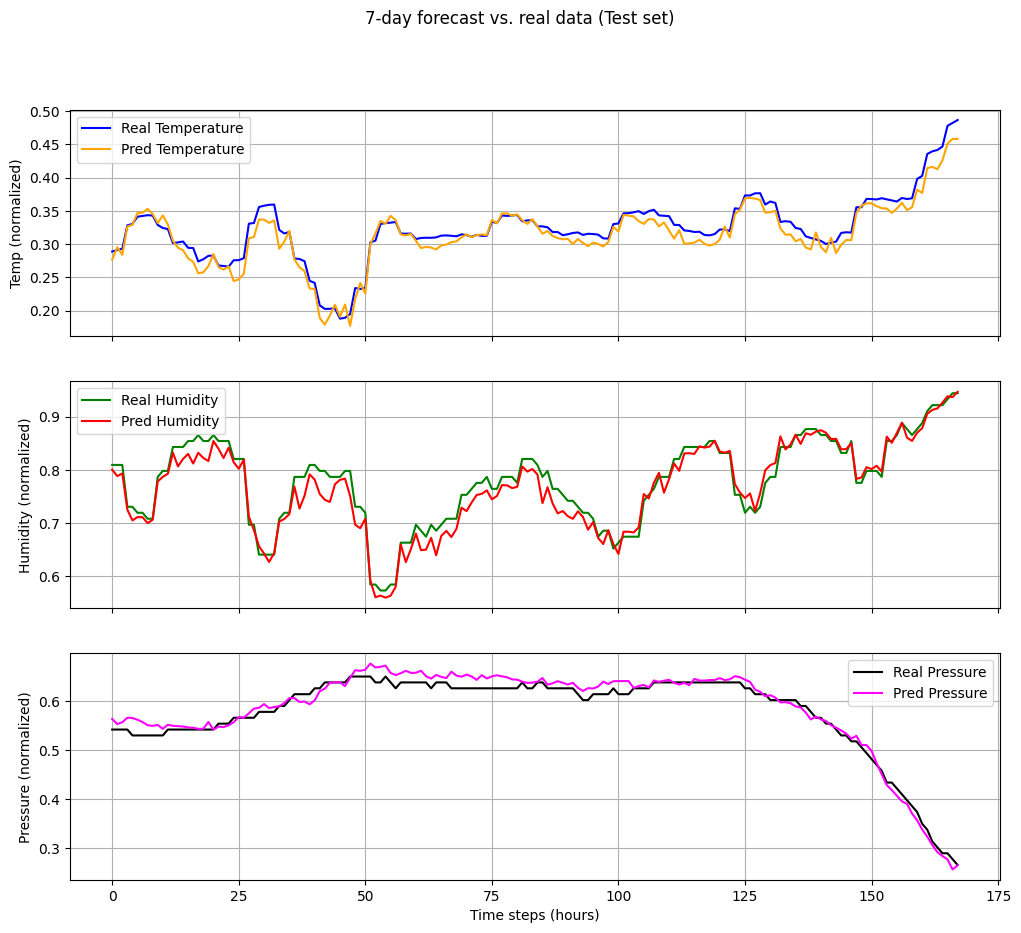

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

time_axis = np.arange(len(y_true_arr))  # 0..167 (допустим)

# 1) Температура
axes[0].plot(time_axis, y_true_arr[:, 0], label='Real Temperature', color='blue')
axes[0].plot(time_axis, y_pred_arr[:, 0], label='Pred Temperature', color='orange')
axes[0].set_ylabel("Temp (normalized)")
axes[0].legend()
axes[0].grid(True)

# 2) Влажность
axes[1].plot(time_axis, y_true_arr[:, 1], label='Real Humidity', color='green')
axes[1].plot(time_axis, y_pred_arr[:, 1], label='Pred Humidity', color='red')
axes[1].set_ylabel("Humidity (normalized)")
axes[1].legend()
axes[1].grid(True)

# 3) Давление
axes[2].plot(time_axis, y_true_arr[:, 2], label='Real Pressure', color='black')
axes[2].plot(time_axis, y_pred_arr[:, 2], label='Pred Pressure', color='magenta')
axes[2].set_ylabel("Pressure (normalized)")
axes[2].set_xlabel("Time steps (hours)")
axes[2].legend()
axes[2].grid(True)

plt.suptitle("7-day forecast vs. real data (Test set)")
plt.show()
